# Pymaceuticals Inc.
---

### Analysis
##### Analysis can go here or at the bottom of the file.  I usually put it at the end.
1. There is a positive correlation of .84 between mouse weight and tumor size. Therefore monitoring the mouse's weight is important.
2. Based on the boxplot, Ramicane and Capomulin were the two treatments where tumor volumes were the lowest in the mice.
3. It would be interesting to see the other drug treatments for future studies to see if these would have been effective or not

In [2]:
%matplotlib notebook

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


In [4]:
mouse_data_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


# Display the data table for preview


In [6]:
# Checking the number of mice.
len(mouse_data_complete["Mouse ID"].unique())

249

In [7]:
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice= mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=mouse_data_complete.loc[mouse_data_complete["Mouse ID"]=="g989"]
duplicate_mouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
# There are multiple ways of doing this and it is good to search online to see the suggestions.
df2 = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] != "g989" ]
df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
len(df2["Mouse ID"].unique())

248

## Summary Statistics

In [12]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_stats=pd.DataFrame()
tumor_stats["Mean Tumor Volume"] = df2.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_stats["Median Tumor Volume"] = df2.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_stats["Tumor Volume Variance"] = df2.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_stats["Tumor Volume Std. Dev."] = df2.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_stats["Tumor Volume Std. Err."] = df2.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Method 2:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using the aggregation method, produce the same summary statistics in a single line

df2.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":['mean', 'median',"var","std","sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<IPython.core.display.Javascript object>


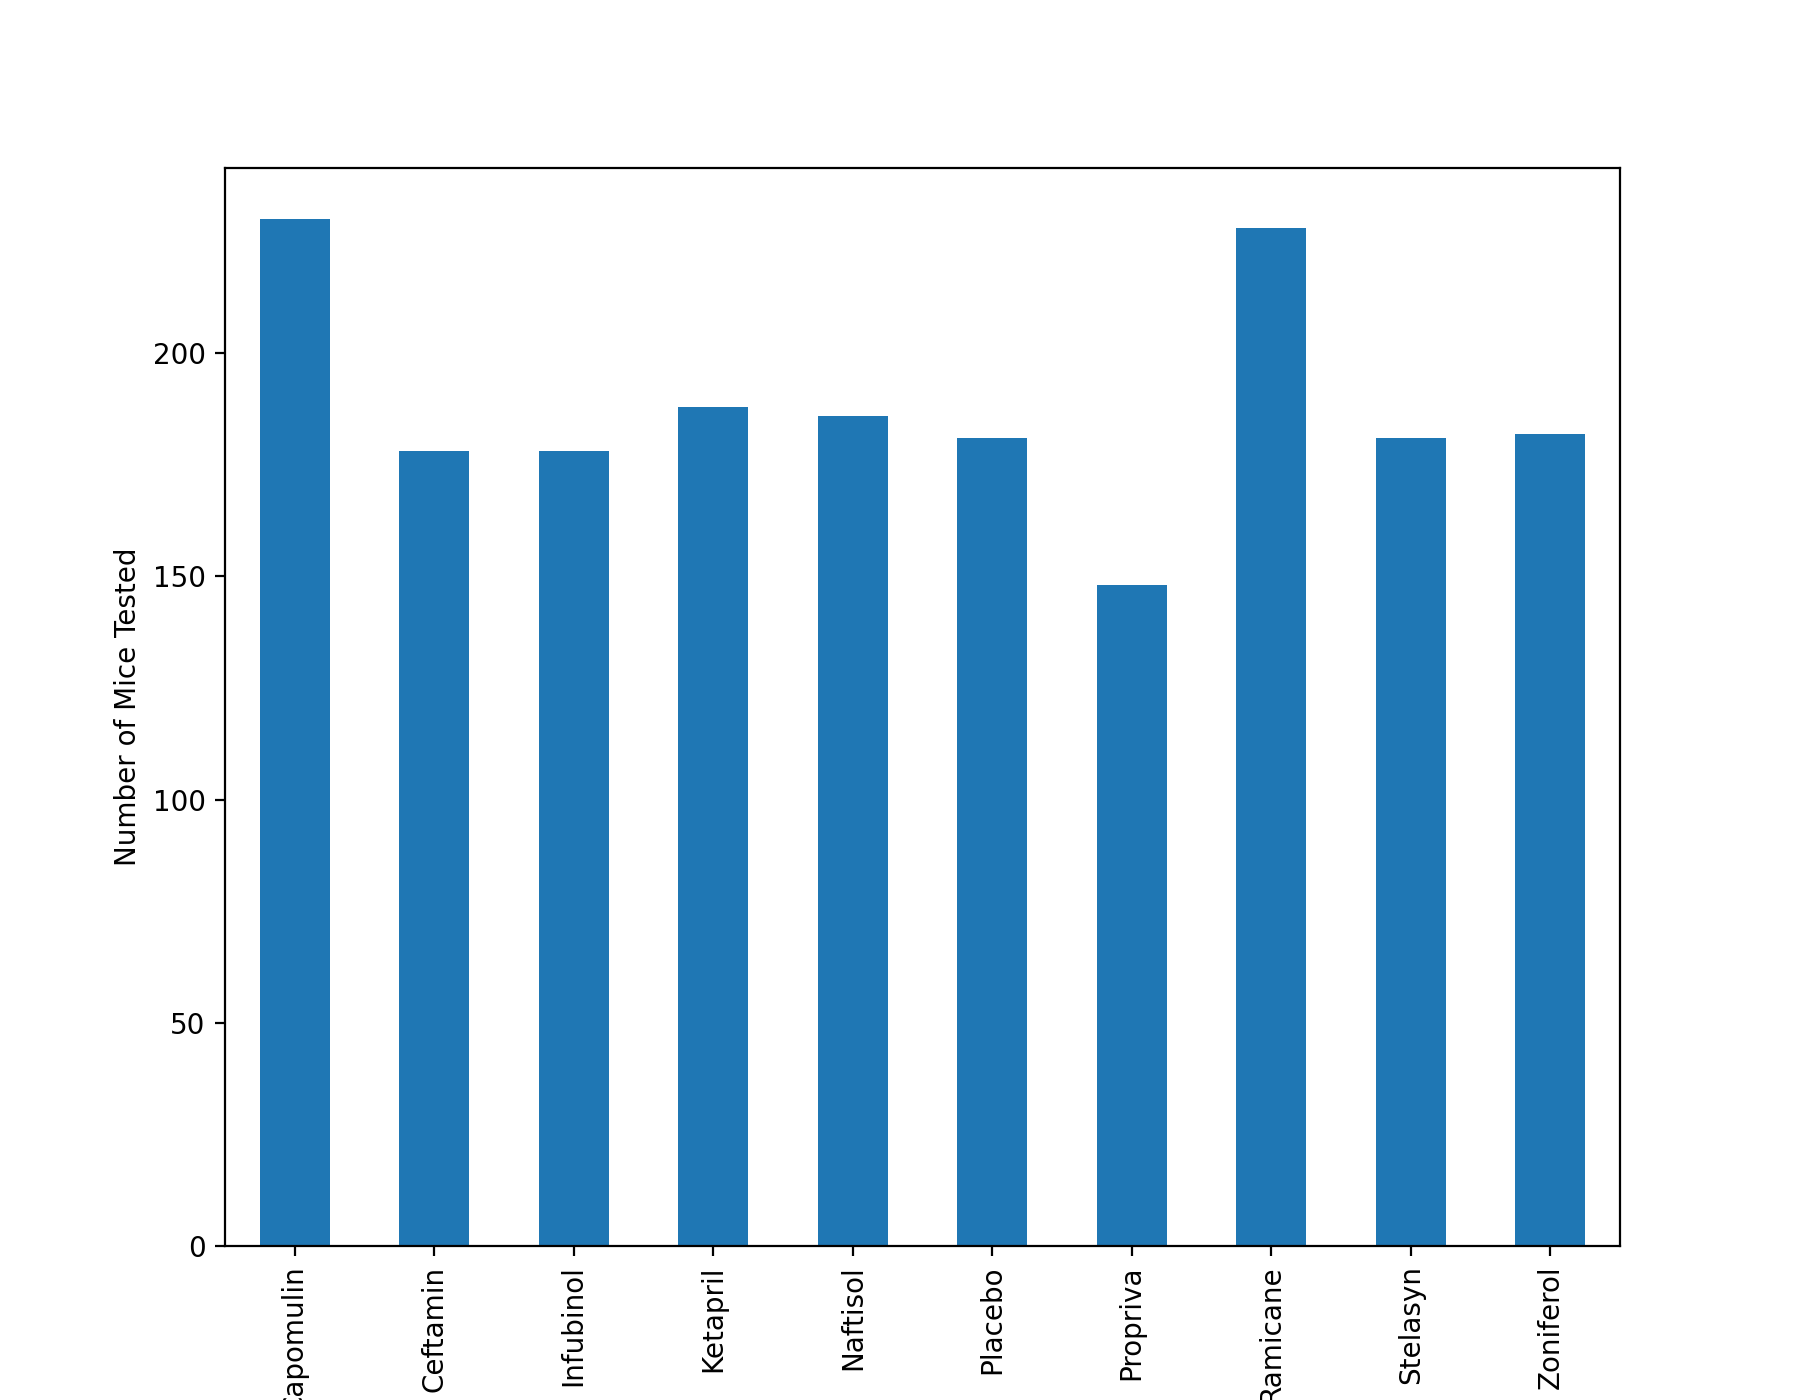

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#first need to find the count per Drug Regimen
count_mice = df2.groupby(["Drug Regimen"]).count()["Mouse ID"]
fig1, ax = plt.subplots(figsize=(9,7))
count_mice.plot.bar(x="Drug Regimen",y="Count",rot=90,ylabel="Number of Mice Tested")



<IPython.core.display.Javascript object>


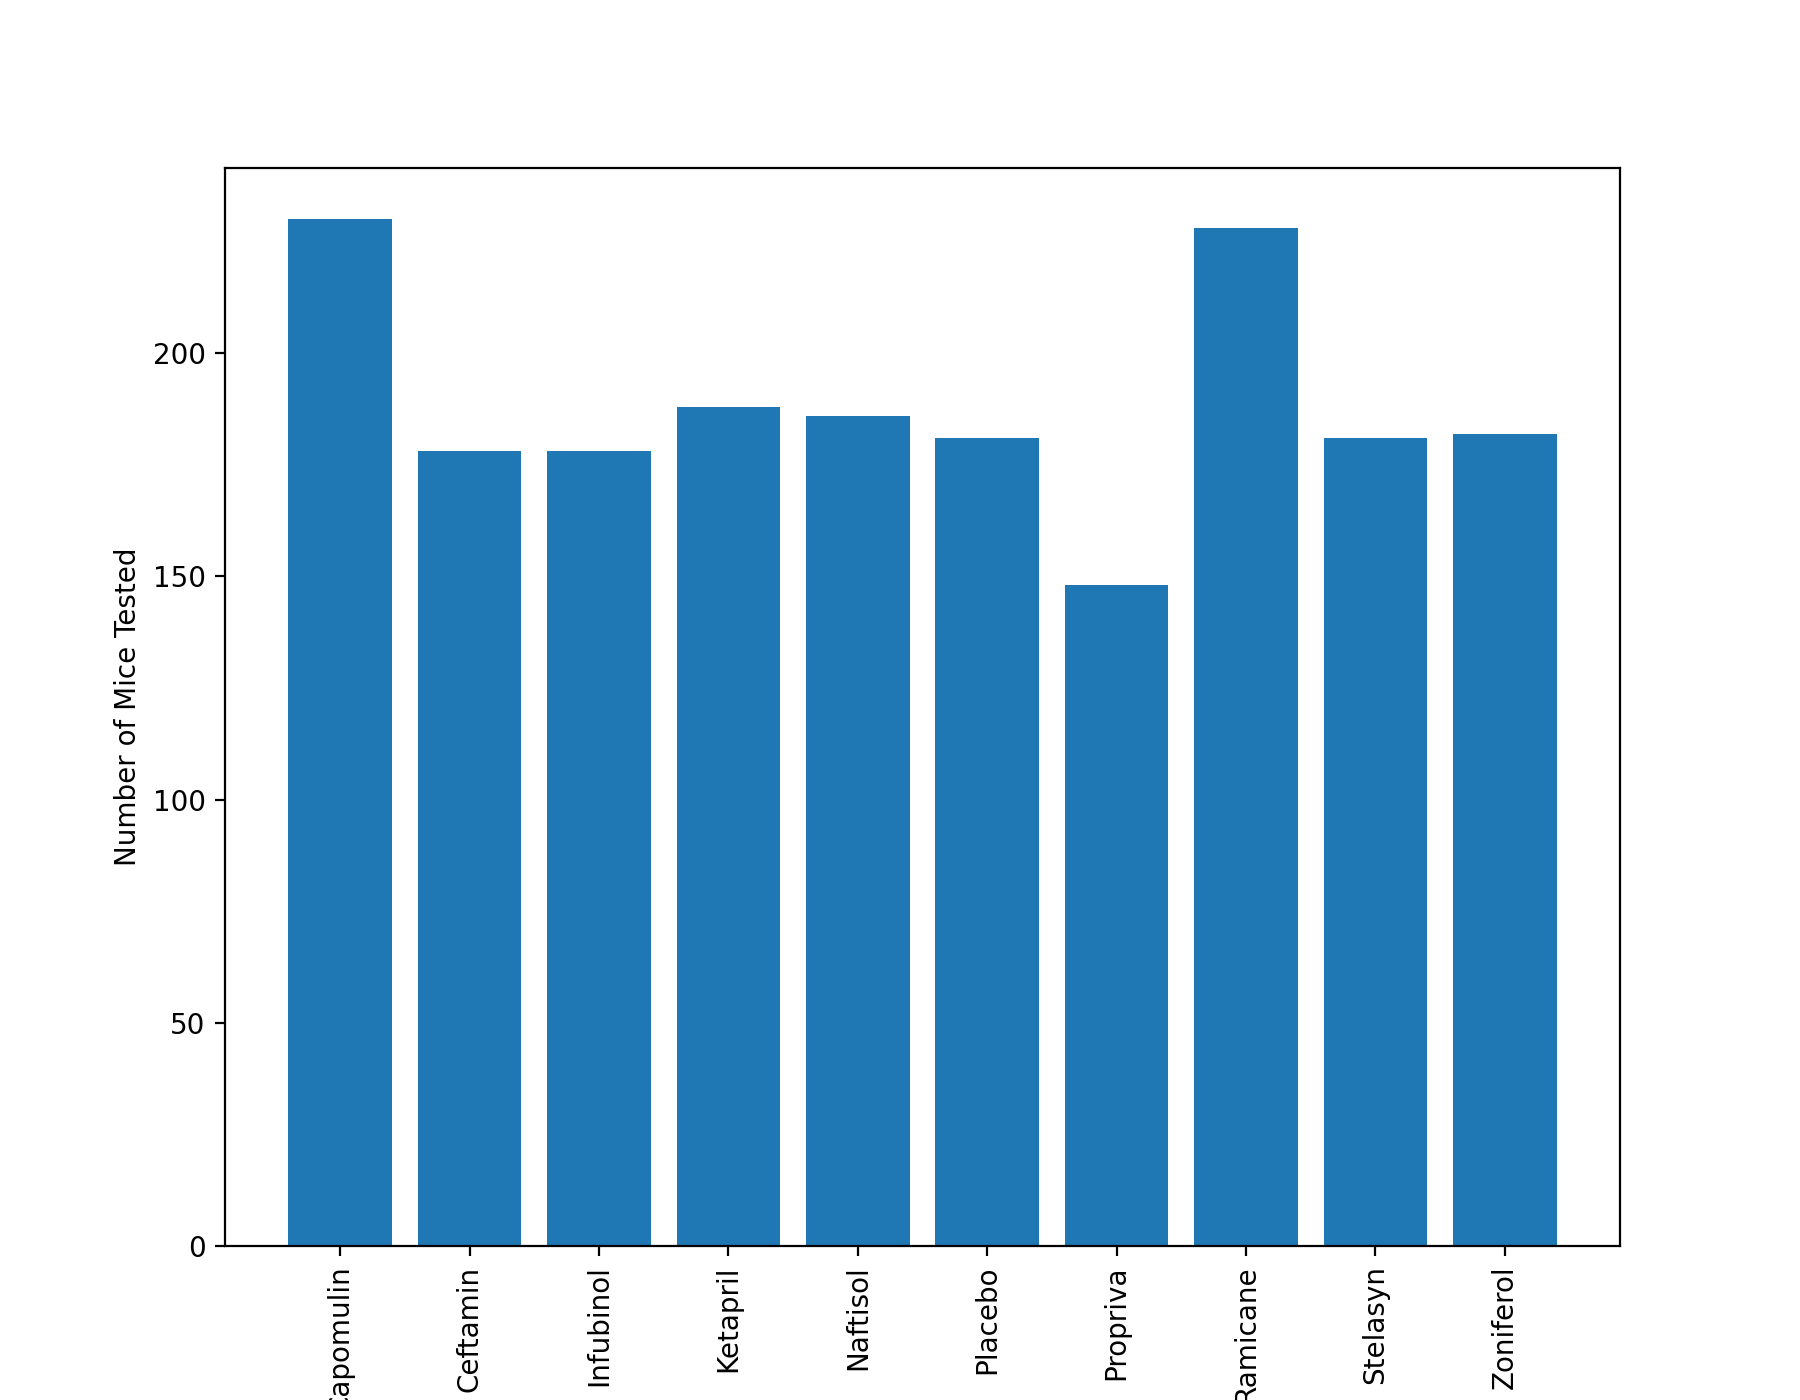

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

import numpy as np

count_mice = df2.groupby(["Drug Regimen"]).count()["Mouse ID"]
count_mice
fig1, ax = plt.subplots(figsize=(9,7))
plt.bar(count_mice.index.values,count_mice.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()


<IPython.core.display.Javascript object>


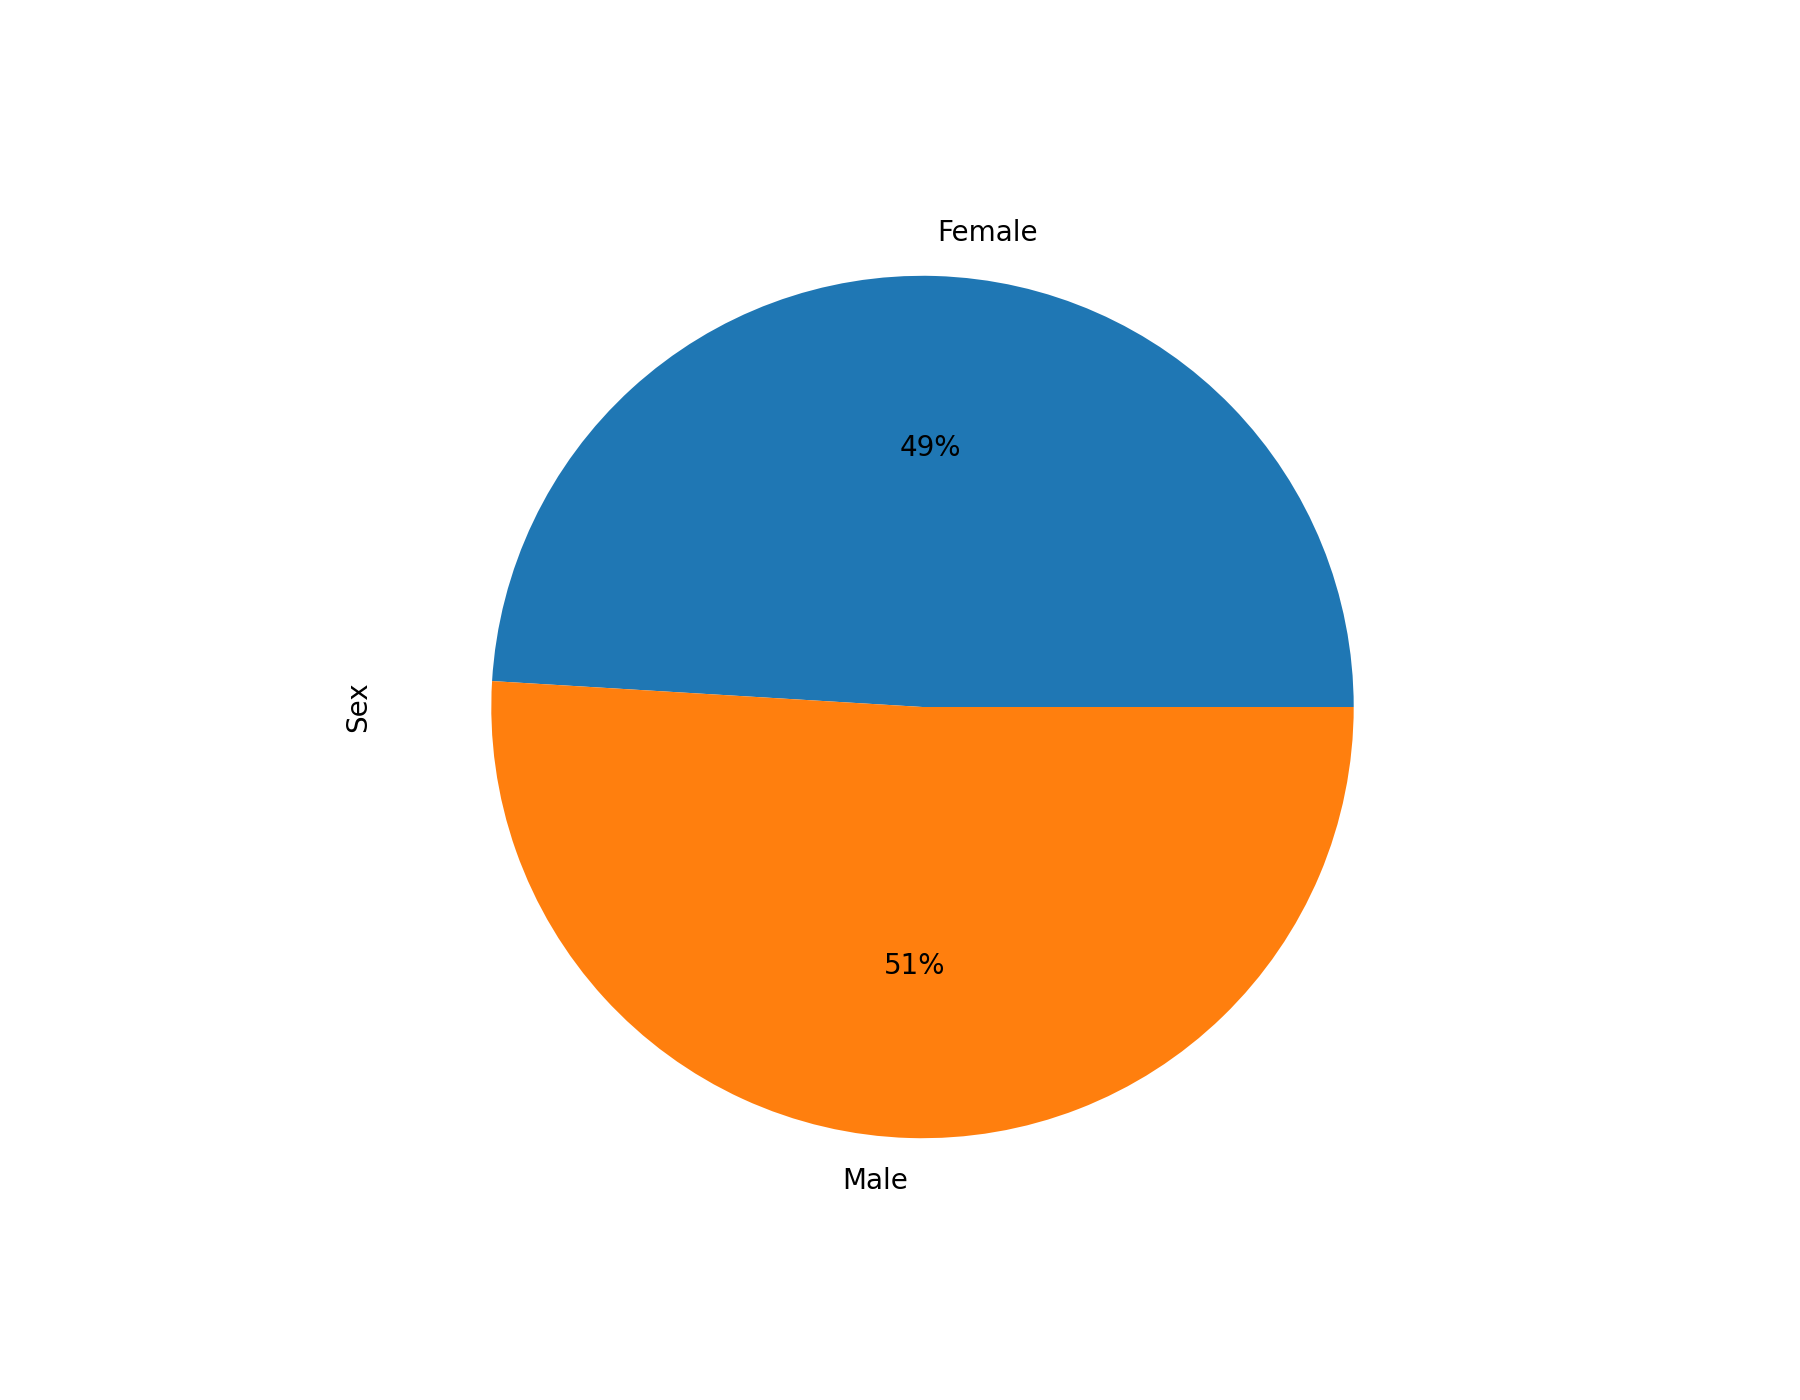

<AxesSubplot:ylabel='Sex'>

In [16]:
# Method1:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# To clarify:  This answers the question:  of all the measurements taken, what percent where on male and female mice.
# This is different than:  of all the mice, what percent were male and female?

gender_groups=df2.groupby(["Sex"])["Sex"].count()
               
fig1, ax = plt.subplots(figsize=(9,7))
x=gender_groups.plot(kind='pie',autopct='%1.0f%%')
x


<IPython.core.display.Javascript object>


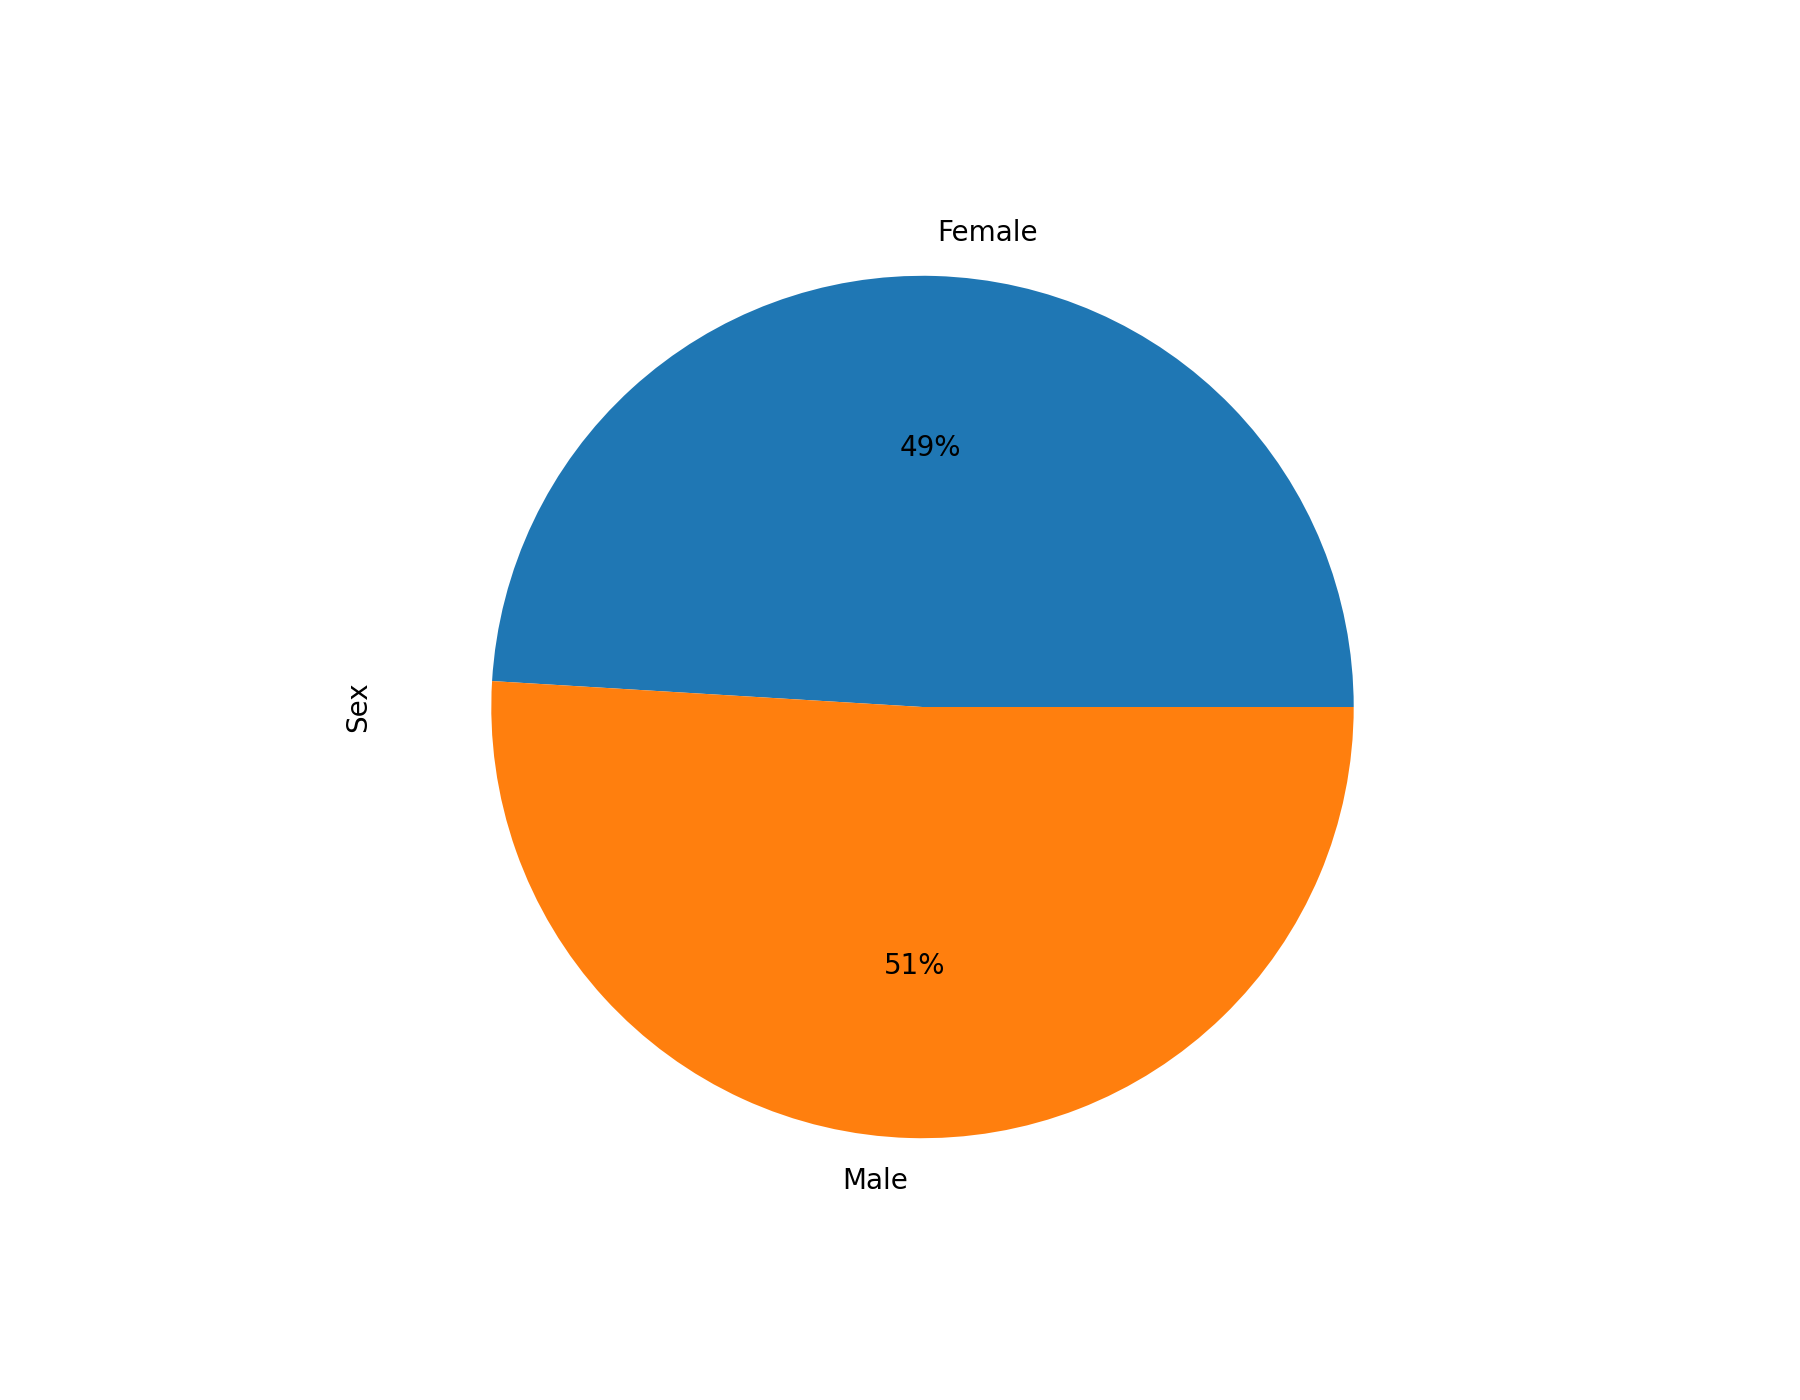

<function matplotlib.pyplot.show(block=None)>

In [17]:
# Method 2:  Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.

fig1, ax = plt.subplots(figsize=(9,7))
plt.pie(gender_groups,labels=("Female","Male"),autopct='%1.0f%%')
plt.ylabel("Sex")
#plt.pie(gender_groups,labels=gender_groups.index,colors=colors,autopct='%1.0f%%')
plt.show



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse


last_timepoint=df2.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint=last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data=pd.merge(last_timepoint,df2,on=["Mouse ID","Timepoint"],how="left")
merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
# More information should be provided about this part since it is confusing and difficult.
# Part of this is similar to Day3 but **the suggestions make more sense** if you know you are doing
# this so so you have 4 lists contained inside a list bc this is used to generate the boxplot in the next cell.

treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

Capomulin_data=[]
Ramicane_data=[]
Infubinol_data=[]
Ceftamin_data=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in merge_data.iterrows():
    if row["Drug Regimen"] == treatment[0]:
        Capomulin_data.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatment[1]:
        Ramicane_data.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatment[2]:
        Infubinol_data.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == treatment[3]:
        Ceftamin_data.append(row["Tumor Volume (mm3)"])
    
    
    # add subset 

by_treatment_df = pd.DataFrame({treatment[0]: Capomulin_data,
                       treatment[1]: Ramicane_data,
                       treatment[2]: Infubinol_data,
                       treatment[3]: Ceftamin_data
                       })
 
    # Determine outliers using upper and lower bounds

by_treatment_df_max=by_treatment_df.max()
by_treatment_df_min=by_treatment_df.min()    

quart_cap = by_treatment_df[treatment[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = by_treatment_df[treatment[0]].max()
min_cap = by_treatment_df[treatment[0]].min()

quart_ram = by_treatment_df[treatment[1]].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = by_treatment_df[treatment[1]].max()
min_ram = by_treatment_df[treatment[1]].min()

quart_inf = by_treatment_df[treatment[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = by_treatment_df[treatment[2]].max()
min_inf = by_treatment_df[treatment[2]].min()

quart_cef = by_treatment_df[treatment[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = by_treatment_df[treatment[3]].max()
min_cef = by_treatment_df[treatment[3]].min()

outliers = pd.DataFrame({"Drug": treatment,
                         "Lower Quartile":[low_cap, low_ram, low_inf, low_cef],
                         "Upper Quartile":[up_cap, up_ram, up_inf, up_cef],
                         "IQR":[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         "Median":[med_cap, med_ram, med_inf, med_cef],
                        "Upper Bound": [upb_cap, upb_ram, upb_inf, upb_cef],
                        "Lower Bound": [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        "Max": [max_cap, max_ram, max_inf, max_cef],
                         "Min": [min_cap, min_ram, min_inf, min_cef]
                        })
outliers
outliers_group = outliers.groupby("Drug")
outliers_group.sum()
    
# Print results of each drugs outliers - results printed don't need to look pretty.  See below.    
# Note:  in the output below:  '31   36.32346' is series index 31 and value 36.32346.  There is only one outlier.



,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


<IPython.core.display.Javascript object>


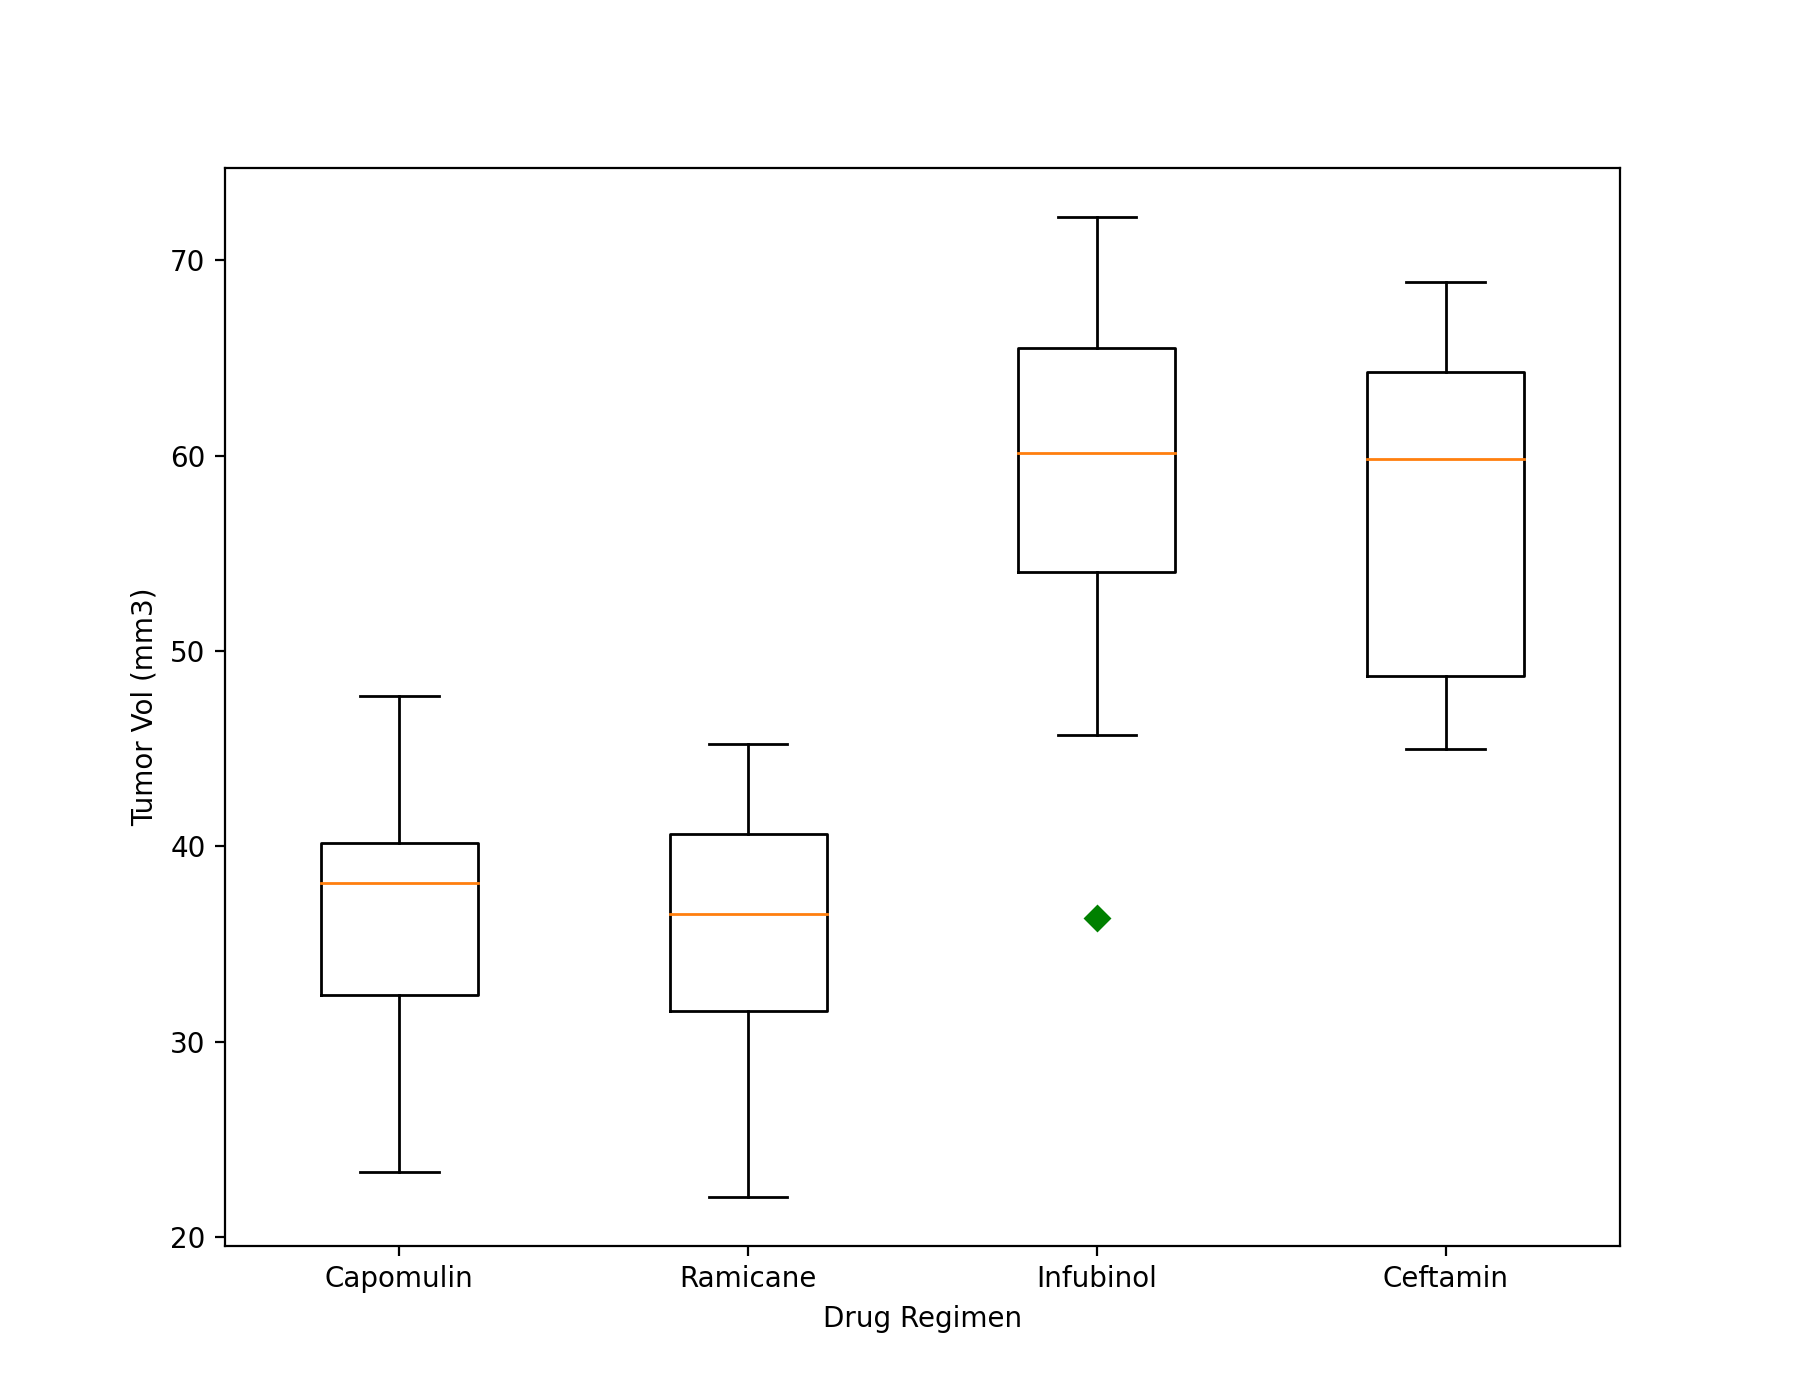

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxplot_list = [by_treatment_df[treatment[0]],
                by_treatment_df[treatment[1]],
                by_treatment_df[treatment[2]],
                by_treatment_df[treatment[3]]]
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_xlabel("Drug Regimen") 
ax.set_ylabel("Tumor Vol (mm3)") 
#tried a new way of making boxplot
ax.boxplot(boxplot_list, 0, "gD")
plt.xticks([1,2,3,4], treatment)
plt.savefig("boxplot")
plt.show()


## Line and Scatter Plots

<IPython.core.display.Javascript object>


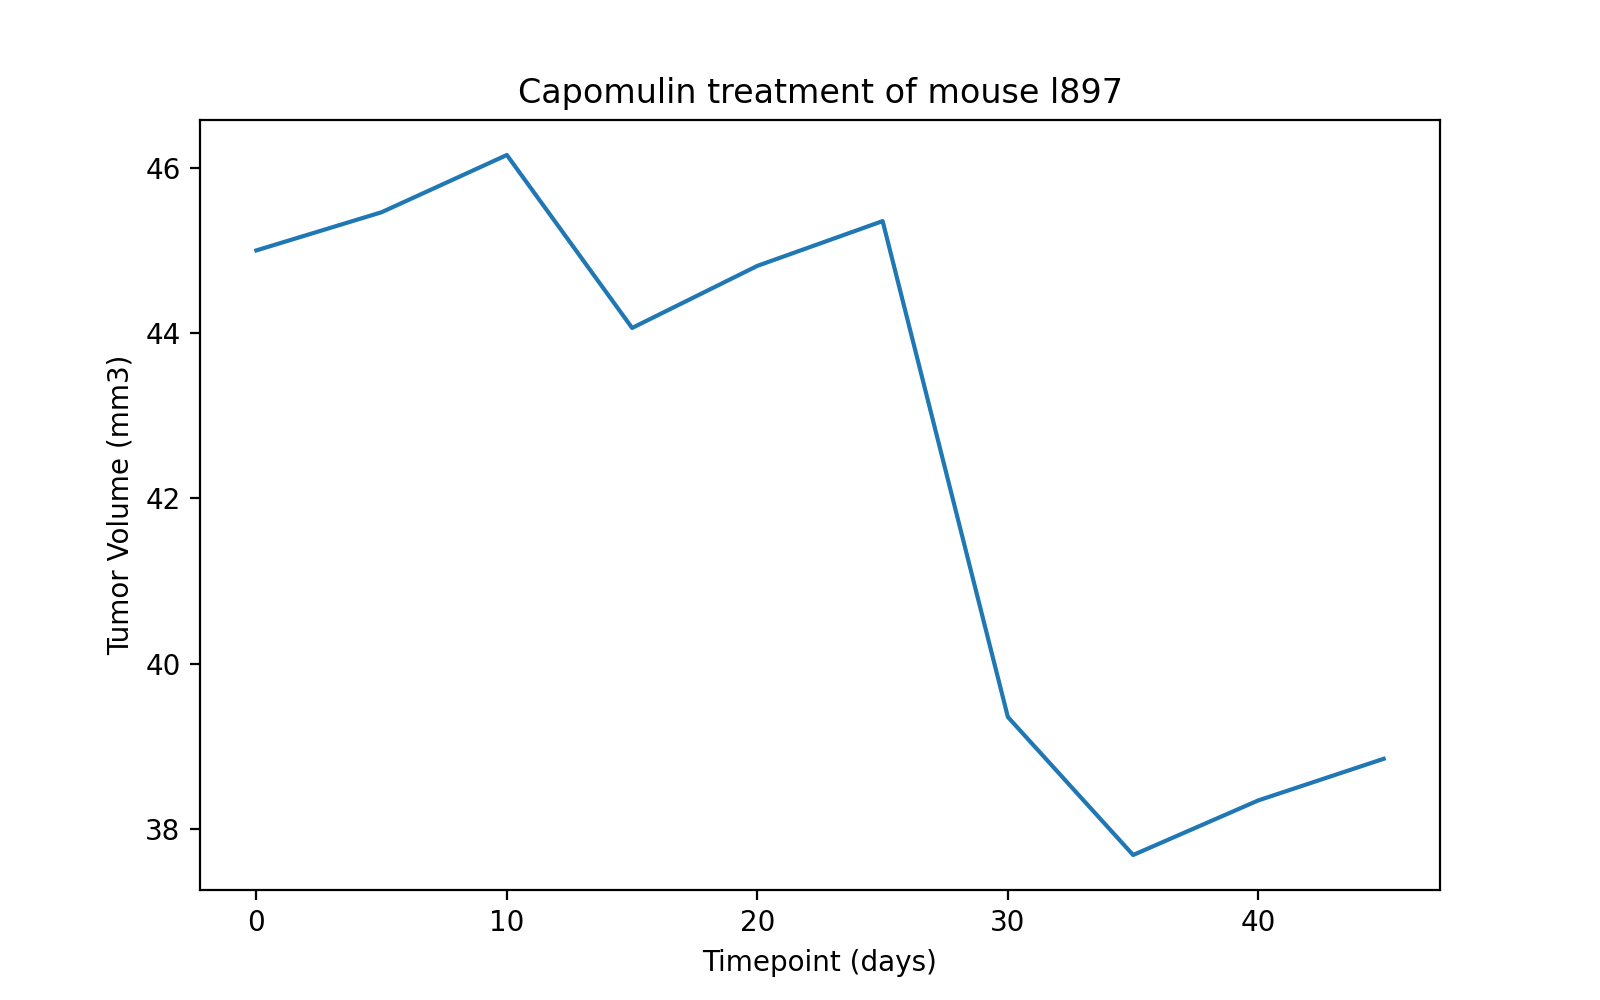

<function matplotlib.pyplot.show(block=None)>

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#the chart in the key says mouse l509 but I could not find that in the data set so I used id #l897 instead
fig1, ax1 = plt.subplots(figsize=(8, 5))
Capomulin_df = df2.loc[df2["Drug Regimen"]=="Capomulin",:]
mouse_l897=Capomulin_df.loc[Capomulin_df["Mouse ID"]=="l897",:]
mouse_l897

x_axis=mouse_l897["Timepoint"]
y_axis=mouse_l897["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l897")
plt.show


<IPython.core.display.Javascript object>


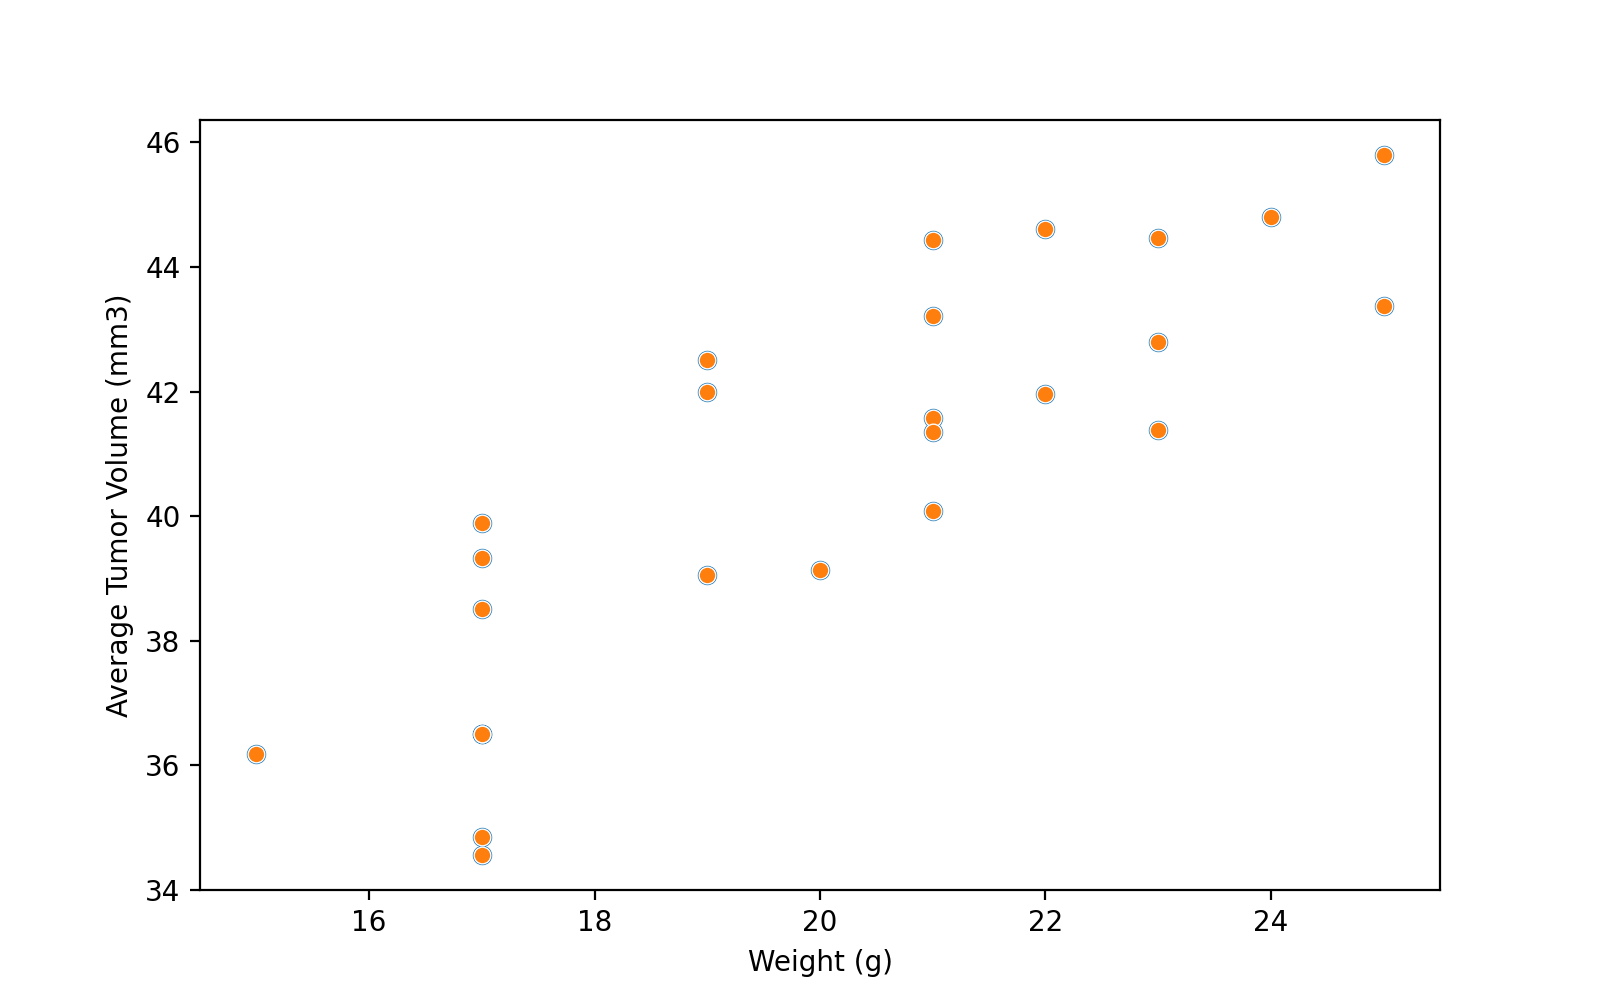

<function matplotlib.pyplot.show(block=None)>

In [21]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
# The chart below shows a dot for each mouse treated with Capomulin using average weight and average tumor Volume.
#  I would make the X-label say something like "Average Weight (g)"

fig1, ax1 = plt.subplots(figsize=(8, 5))
x=Capomulin_df.groupby("Mouse ID").mean()
plt.scatter(x["Weight (g)"], x["Tumor Volume (mm3)"])
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show


## Correlation and Regression

<IPython.core.display.Javascript object>


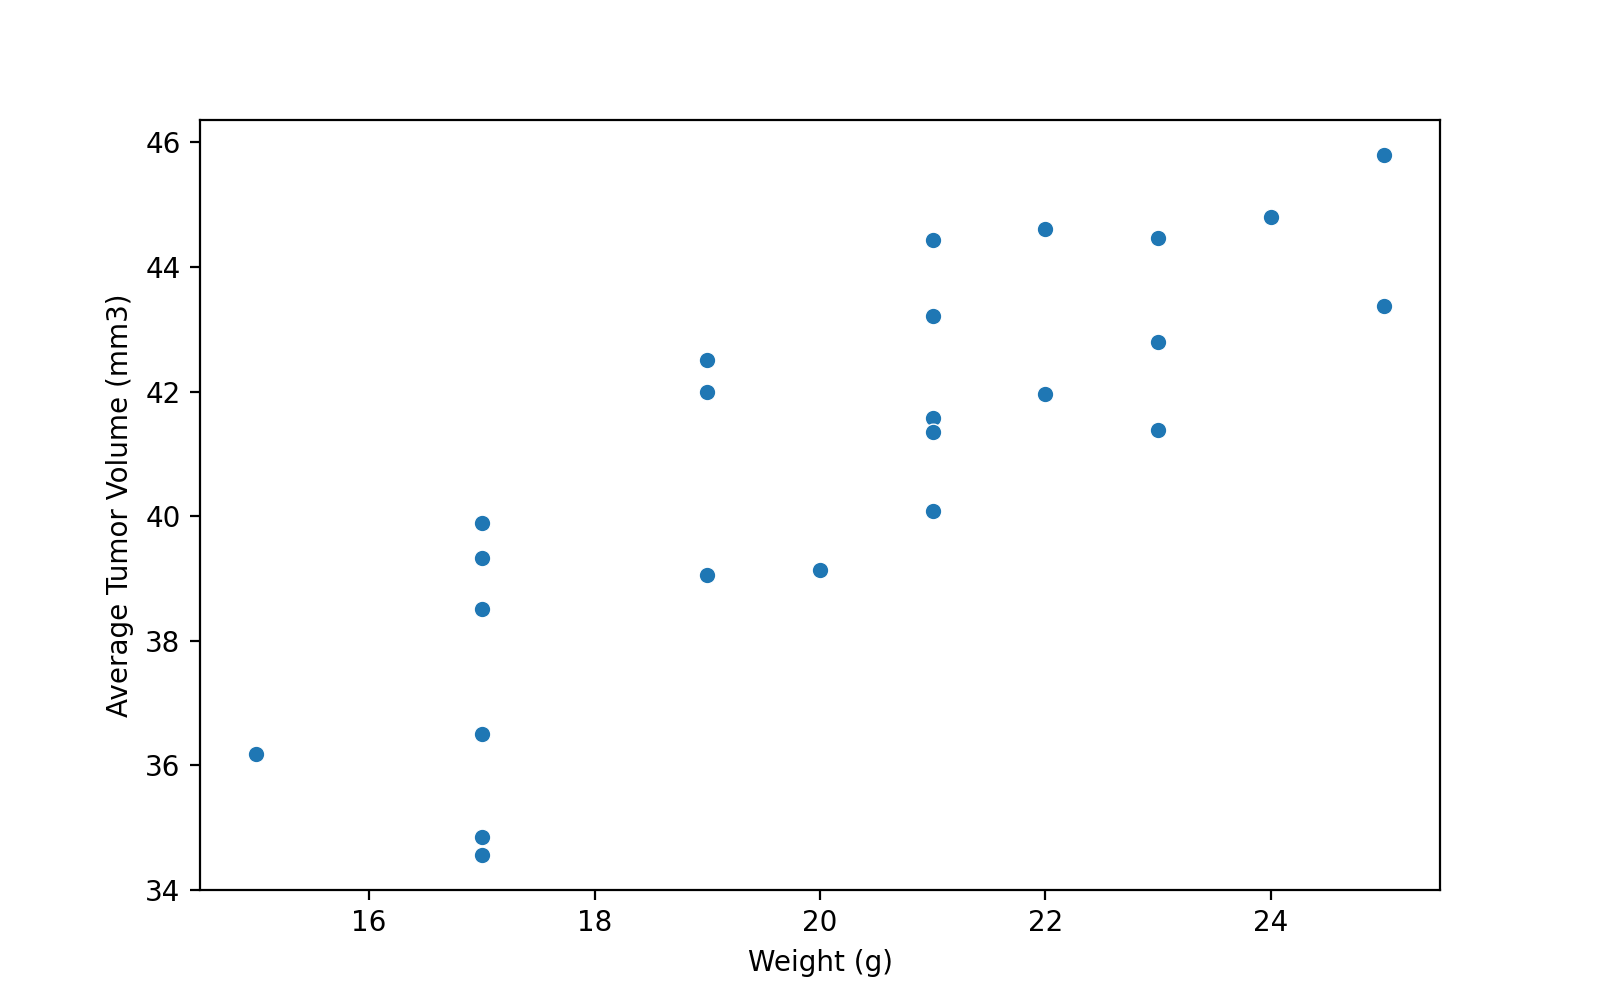

The correlation between mouse weight and the average tumor volume is 0.84


<function matplotlib.pyplot.show(block=None)>

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress
#pip install seaborn
import seaborn as sb

x=Capomulin_df.groupby("Mouse ID").mean()
correlation = st.pearsonr(x["Weight (g)"],x["Tumor Volume (mm3)"])
fig1, ax1 = plt.subplots(figsize=(8, 5))
sb.scatterplot(x = 'Weight (g)',
            y = "Tumor Volume (mm3)", 
            data = x)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show

<IPython.core.display.Javascript object>


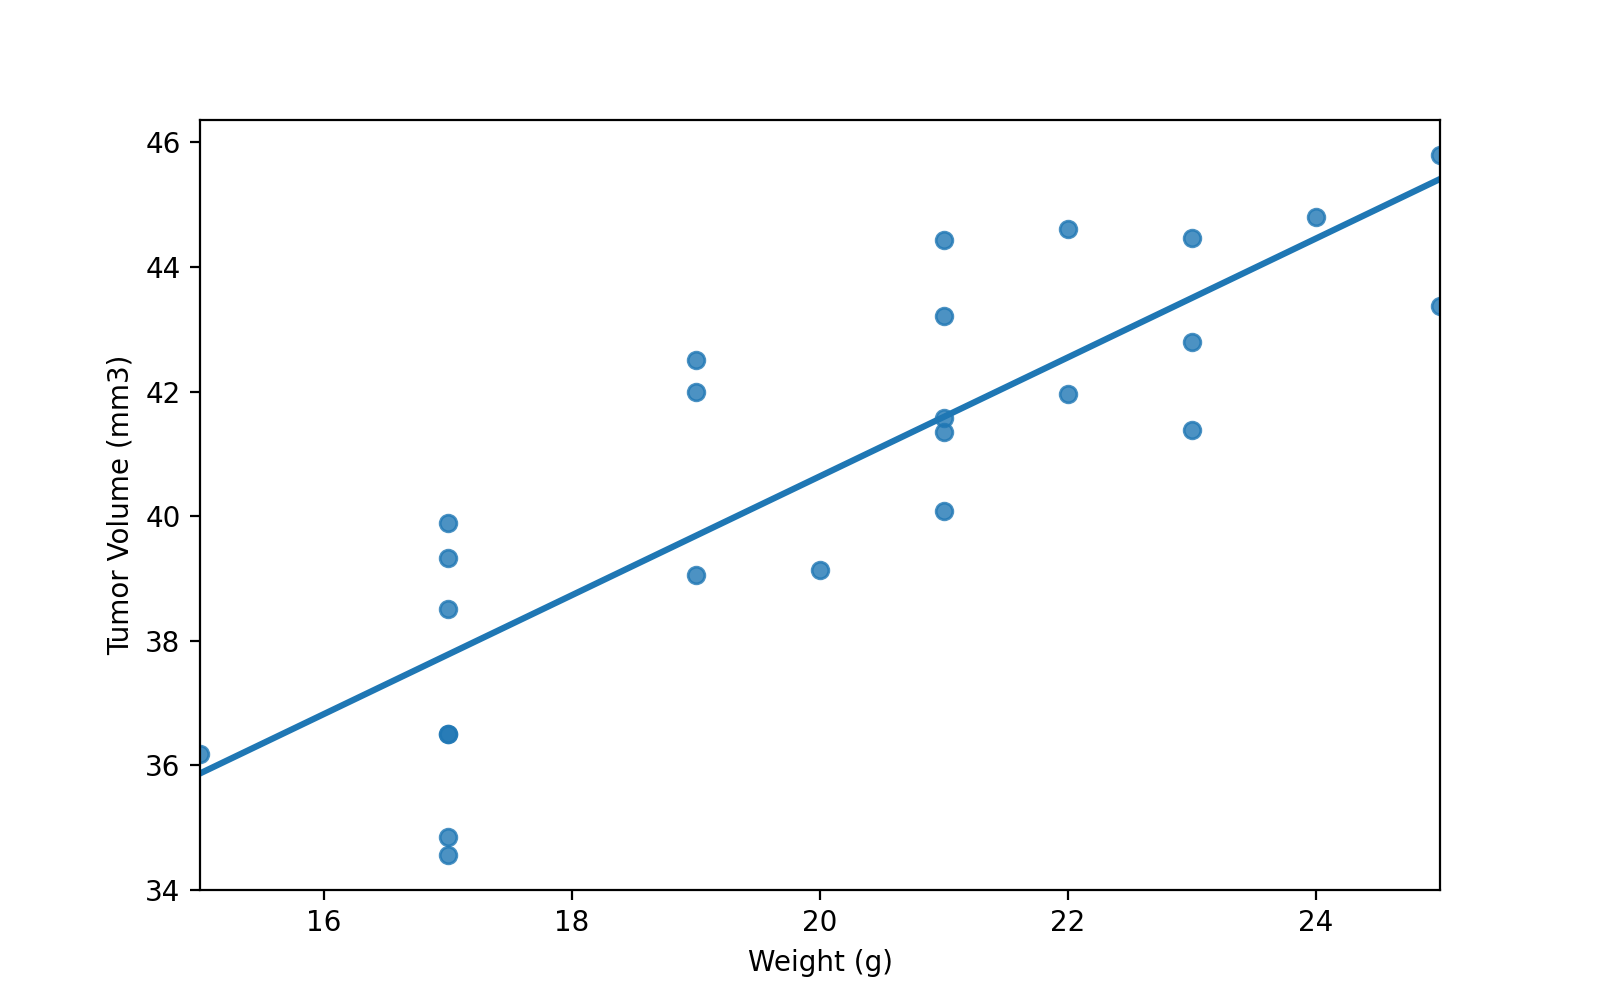

<AxesSubplot:xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

In [25]:
import seaborn as sb
fig1, ax1 = plt.subplots(figsize=(8, 5))
sb.regplot(x = 'Weight (g)',
            y = "Tumor Volume (mm3)", 
            ci = None,
            data = x)